# Programming Excercise 1

# Linear Regression with one variable

The aim of the excercise is to implement linear regression and get to see it work on data

In [3]:
# %load ../../standard_import.txt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import axes3d

pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 150)
pd.set_option('display.max_seq_items', None)
 
#%config InlineBackend.figure_formats = {'pdf',}
%matplotlib inline  

import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

In [4]:
#loading the data into X and y variables
input_path = ''
data = np.loadtxt(input_path + 'Data_Sets/ex1data1.txt', delimiter=',')

X = np.c_[np.ones(data.shape[0]),data[:,0]]
y = np.c_[data[:,1]]

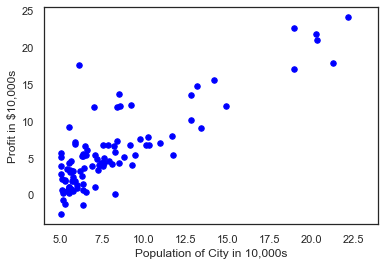

In [7]:
#Plotting the data

plt.scatter(X[:,1], y, s=30, c='b', marker='o', linewidths=1)
plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s');


# Gradient Descent

In [8]:
#Define Cost function 

def computeCost(X, y, theta=[[0],[0]]):
    m = y.size
    J = 0
    
    h = X.dot(theta)
    
    J = 1/(2*m)*np.sum(np.square(h-y))
    
    return(J)

In [9]:
computeCost(X,y)

32.072733877455676

In [10]:
def gradientDescent(X, y, theta=[[0],[0]], alpha=0.01, num_iters=1500):
    m = y.size
    J_history = np.zeros(num_iters)
    
    for iter in np.arange(num_iters):
        h = X.dot(theta)
        theta = theta - alpha*(1/m)*(X.T.dot(h-y))
        J_history[iter] = computeCost(X, y, theta)
    return(theta, J_history)

theta:  [-3.63029144  1.16636235]


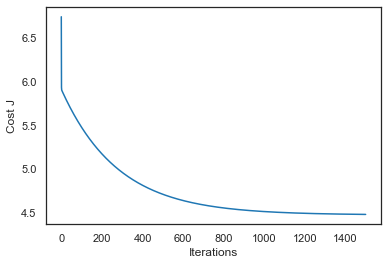

In [11]:
# Theta for minimized cost J

theta , Cost_J = gradientDescent(X, y)
print('theta: ',theta.ravel())

plt.plot(Cost_J)
plt.ylabel('Cost J')
plt.xlabel('Iterations');

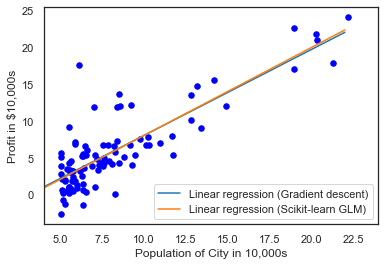

In [14]:


xx = np.arange(4,23)
yy = theta[0]+theta[1]*xx

# Plot gradient descent
plt.scatter(X[:,1], y, s=30, c='b', marker='o', linewidths=1)
plt.plot(xx,yy, label='Linear regression (Gradient descent)')

# Compare with Scikit-learn Linear regression 
regr = LinearRegression()
regr.fit(X[:,1].reshape(-1,1), y.ravel())
plt.plot(xx, regr.intercept_+regr.coef_*xx, label='Linear regression (Scikit-learn GLM)')

plt.xlim(4,24)
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')
plt.legend(loc=4);

In [15]:
#Using linear regression model, predict profit for a city with population of 35000 and 70000
print(theta.T.dot([1, 35000]))
print(theta.T.dot([1, 70000]))

[40819.05197031]
[81641.73423205]
